<a href="https://colab.research.google.com/github/trangthuy38/Projects/blob/main/Investigating_Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

# Mục mới

Potential Exploration Areas

Popular Genres in the 90s:
Identify the most popular genres of movies released in the 1990s.
Analyze how genre popularity has evolved over the decade.

Director and Actor Analysis:
Determine the most prolific directors and actors of the 90s.
Identify directors and actors whose careers peaked in the 90s.

Movie Duration Trends:
Analyze the average movie duration in the 90s.
Compare the duration of different genres.

Country of Origin:
Determine the dominant countries producing movies in the 90s.
Analyze the impact of international cinema on the 90s.

Keyword Analysis:
Extract keywords from movie titles and descriptions.
Identify trends in movie themes and plots.

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
netflix_df.shape

(4812, 11)

In [ ]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [ ]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [ ]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='%B %d, %Y')

In [ ]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
duration                 int64
description             object
genre                   object
dtype: object

In [ ]:
netflix_df.describe()

,date_added,release_year,duration
count,4812,4812.000000,4812.000000
mean,2019-01-07 19:44:08.379052288,2012.711554,99.566708
min,2008-01-01 00:00:00,1942.000000,1.000000
25%,2018-03-01 00:00:00,2011.000000,88.000000
50%,2019-03-02 00:00:00,2016.000000,99.000000
75%,2020-01-04 00:00:00,2018.000000,116.000000
max,2021-01-16 00:00:00,2021.000000,253.000000
std,NaN,9.517978,30.889305


In [ ]:
netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812
unique,4812,2,4812,3615,4690,72,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,2,1343


In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [ ]:
netflix_df.duplicated().sum()

0

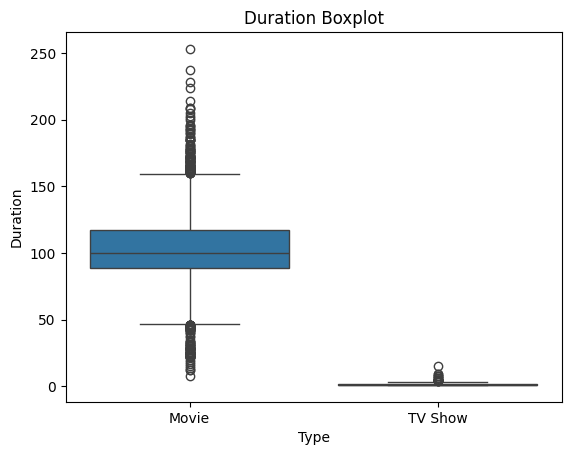

In [ ]:
sns.boxplot(
    x = "type",
    y = "duration",
    data=netflix_df
)

plt.title("Duration Boxplot")
plt.xlabel("Type")
plt.ylabel("Duration")
plt.show()

Movies vary in duration from a few minutes to more than two hours, TV shows are mainly about minutes long

In [ ]:
# Filter the data for movies released in the 1990s
# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Filter the to keep only movies released in the 1990s
movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]

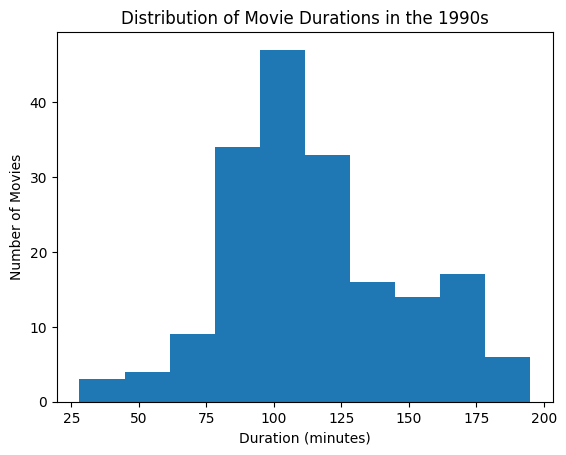

In [ ]:
# Visualize the duration column of filtered data to see the distribution of movie durations
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

The films of the 1990s were mostly about 100 minutes long

In [ ]:
# Analyze popular genres
genre_counts = movies_1990s['genre'].value_counts().reset_index(name='count')
genre_counts.columns = ['genre', 'count']

# Print results for most popular genre
print("Most popular genre in the 1990s movies:")
print(genre_counts.sort_values(by='count', ascending=False).head(1))

Most popular genre in the 1990s movies:
    genre  count
0  Action     48


<Figure size 800x600 with 0 Axes>

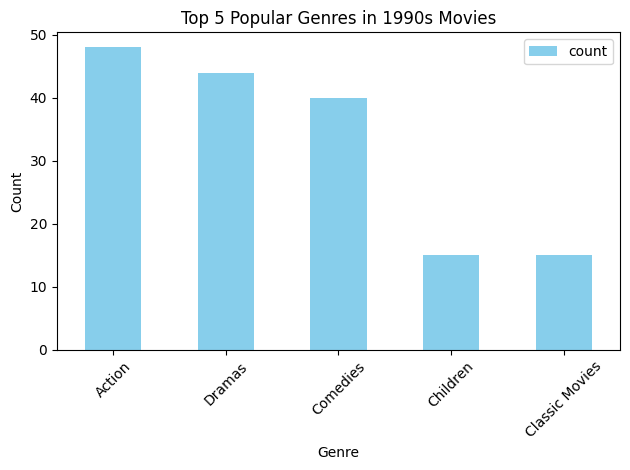

In [ ]:
# Plot bar chart for top 5 genres
plt.figure(figsize=(8, 6))
genre_counts.sort_values(by='count', ascending=False).head(5).plot(kind='bar', x='genre', y='count', color='skyblue')
plt.title("Top 5 Popular Genres in 1990s Movies")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-44-6761b7860686>:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = genre_by_year.pivot_table(index='release_year', columns='genre', values='count', aggfunc=sum)


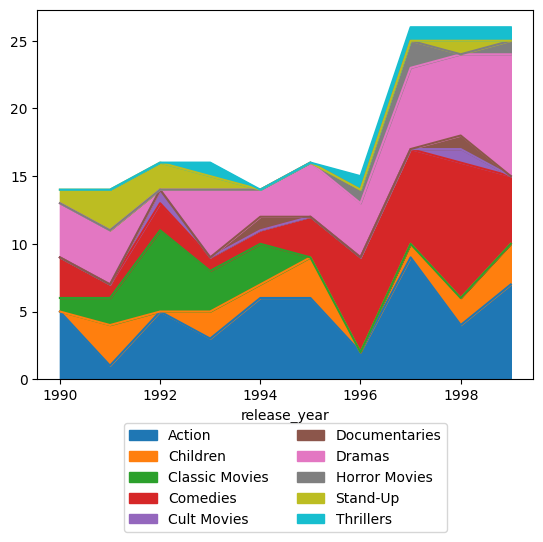

In [ ]:
# Group movies by release year and genre, then calculate the count for each group
genre_by_year = (
    movies_1990s.groupby(['release_year', 'genre'])
    .size()
    .to_frame(name='count')
    .reset_index()
)

# Pivot table to reshape data for easier visualization
pivot_table = genre_by_year.pivot_table(index='release_year', columns='genre', values='count', aggfunc=sum)
# Plot time series for each genre
pivot_table.plot(kind='area')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

The number of films in each genre has fluctuated rapidly over the years, but generally, the drama, comedy and action categories have increased

In [ ]:
# Count the number of films per director
director_counts = movies_1990s['director'].value_counts().reset_index(name='count')
director_counts.columns = ['director', 'num_movies']

# Showing the 10 directors with the most movies
top_directors = director_counts.head(10)
print(top_directors)

             director  num_movies
0          Johnnie To           4
1     Youssef Chahine           3
2         Umesh Mehra           3
3      Gregory Hoblit           3
4        Subhash Ghai           3
5        Mahesh Bhatt           3
6   Rajkumar Santoshi           3
7  Sooraj R. Barjatya           3
8        David Dhawan           2
9   Quentin Tarantino           2


In [ ]:
# Separate the actors in the 'cast' column
movies_1990s['cast'] = movies_1990s['cast'].str.split(', ')
df_90s = movies_1990s.explode('cast')

# Count the number of movies per actor
actor_counts = df_90s['cast'].value_counts().reset_index(name='count')
actor_counts.columns = ['actor', 'num_movies']

# Showing the 10 actors with the most movies
top_actors = actor_counts.head(10)
print(top_actors)

            actor  num_movies
0  Shah Rukh Khan          12
1     Anupam Kher           9
2     Salman Khan           7
3    Mohnish Bahl           7
4  Karisma Kapoor           6
5       Alok Nath           6
6     Tinnu Anand           5
7  Gulshan Grover           5
8     Reema Lagoo           5
9    Paresh Rawal           5


<ipython-input-46-30fd54f85355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_1990s['cast'] = movies_1990s['cast'].str.split(', ')


In [ ]:
# Average movie duration in the 1990s
avg_duration_90s = movies_1990s['duration'].mean()
print("Average movie duration in the 1990s (minutes):", avg_duration_90s)

Average movie duration in the 1990s (minutes): 115.12021857923497


In [ ]:
# Calculate average duration by genre
avg_duration_by_genre = movies_1990s.groupby('genre')['duration'].mean().sort_values(ascending=False)
print("\nAverage movie duration by genre in the 1990s:")
print(avg_duration_by_genre)


Average movie duration by genre in the 1990s:
genre
Dramas            132.045455
Classic Movies    128.733333
Action            120.145833
Comedies          110.700000
Thrillers         109.200000
Horror Movies     104.750000
Cult Movies       100.000000
Children           93.066667
Documentaries      72.000000
Stand-Up           53.250000
Name: duration, dtype: float64


In [ ]:
# Count the number of films per country
country_counts = movies_1990s['country'].value_counts()

# Showing the 10 most film-producing countries
print(country_counts.head(10))

country
United States     99
India             34
United Kingdom    17
Hong Kong         11
France             5
Australia          5
Mexico             3
Germany            2
Japan              2
Poland             1
Name: count, dtype: int64


In [ ]:
# Create a pivot table between country and genre
genre_by_country = movies_1990s.groupby(['country', 'genre']).size().unstack()
genre_by_country

genre,Action,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Stand-Up,Thrillers
country,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Australia,1.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
Canada,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Egypt,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
France,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Germany,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hong Kong,9.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
India,11.0,NaN,1.0,8.0,NaN,NaN,14.0,NaN,NaN,NaN
Japan,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Load the required NLTK datasets
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Text Preprocessing Function
def preprocess(text):
    # Convert text to lower case
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Separate words in sentences
    words = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Stemming
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(w) for w in words]
    wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
    lemmatizer = WordNetLemmatizer()
    pos_tagged_sentence = nltk.pos_tag(words)
    words = [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_sentence]
    return " ".join(words)

# Apply preprocessing function to the 'description' column
movies_1990s['processed_description'] = movies_1990s['description'].apply(preprocess)
movies_1990s['processed_description']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-52-bab6a128e462>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_1990s['processed_description'] = movies_1990s['description'].apply(preprocess)


6       one high school student attack dedicate teache...
118     center engross melodrama golden globenominated...
145     runin richard grieco dimwits doug steve gain e...
167     philander club promoter set woo rich glamorous...
194     raise kindly thief orphan jimmy go run goon fa...
                              ...                        
4672    three intrepid teen roam street beirut midst c...
4689    backwater iowa town young gilbert torn take ca...
4718    arm ingenious arsenal two topnotch government ...
4746    legendary lawman wyatt earp continually odds g...
4756    brother become involve deadly bank robbery hea...
Name: processed_description, Length: 183, dtype: object

In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(movies_1990s['processed_description'])

# Shows the most popular keywords
features = vectorizer.get_feature_names_out()
print(features)

['agent' 'base' 'become' 'becomes' 'best' 'bond' 'boy' 'brother' 'child'
 'city' 'college' 'come' 'comic' 'cop' 'create' 'crime' 'criminal'
 'daughter' 'death' 'discover' 'escape' 'face' 'fall' 'family' 'father'
 'film' 'find' 'follow' 'force' 'former' 'four' 'friend' 'gang' 'get'
 'girl' 'girlfriend' 'go' 'grow' 'he' 'help' 'husband' 'investigate'
 'jail' 'killer' 'learn' 'life' 'live' 'love' 'make' 'man' 'meet' 'men'
 'mission' 'move' 'murder' 'must' 'new' 'night' 'one' 'orphan' 'partner'
 'plan' 'play' 'police' 'power' 'reporter' 'return' 'revenge' 'rise' 'run'
 'scheme' 'school' 'secret' 'seek' 'set' 'sister' 'son' 'standup' 'start'
 'stop' 'story' 'struggle' 'student' 'take' 'team' 'teen' 'terrorist'
 'three' 'time' 'try' 'turn' 'twin' 'two' 'wealthy' 'whose' 'wife' 'wild'
 'woman' 'work' 'young']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics (adjustable)
num_topics = 5

# Create an LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Print the topics and keywords that represent each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([features[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
get secret agent night meet family best wild base comic
Topic 1:
two child become teen mission partner film take love learn
Topic 2:
man woman murder he gang wife try scheme return escape
Topic 3:
turn help move student make force go must girlfriend face
Topic 4:
find young life take new boy work struggle standup return
